In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.shape

(219765, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219765 entries, 0 to 219764
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            219765 non-null  int64  
 1   type            219765 non-null  object 
 2   amount          219765 non-null  float64
 3   nameOrig        219765 non-null  object 
 4   oldbalanceOrg   219765 non-null  float64
 5   newbalanceOrig  219764 non-null  float64
 6   nameDest        219764 non-null  object 
 7   oldbalanceDest  219764 non-null  float64
 8   newbalanceDest  219764 non-null  float64
 9   isFraud         219764 non-null  float64
 10  isFlaggedFraud  219764 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 18.4+ MB


In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,219765.000000,2.197650e+05,2.197650e+05,2.197640e+05,2.197640e+05,2.197640e+05,219764.000000,219764.0
mean,10.330407,1.808084e+05,8.825071e+05,9.003847e+05,9.497383e+05,1.189618e+06,0.000705,0.0
std,2.192156,3.254299e+05,2.794303e+06,2.831588e+06,2.369067e+06,2.633400e+06,0.026548,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.229706e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,11.000000,7.083043e+04,1.952100e+04,0.000000e+00,5.525830e+04,1.464908e+05,0.000000,0.0
75%,12.000000,2.306170e+05,1.932596e+05,2.294439e+05,7.889001e+05,1.195410e+06,0.000000,0.0
max,14.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.903958e+07,3.904248e+07,1.000000,0.0


In [9]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [10]:
df[["isFraud","isFlaggedFraud"]].value_counts()

,,count
isFraud,isFlaggedFraud,
0.0,0.0,219609
1.0,0.0,155


In [11]:
df["type"].value_counts()

,count
type,
PAYMENT,79861
CASH_OUT,73992
CASH_IN,45648
TRANSFER,18450
DEBIT,1814


In [12]:
df["isFraud"].value_counts(normalize=True)

,proportion
isFraud,
0.0,0.999295
1.0,0.000705


In [13]:
pd.crosstab(df['type'], df['isFraud'], normalize='index')

isFraud,0.0,1.0
type,,
CASH_IN,1.000000,0.000000
CASH_OUT,0.998932,0.001068
DEBIT,1.000000,0.000000
PAYMENT,1.000000,0.000000
TRANSFER,0.995881,0.004119


In [14]:
df2 = df[df['type'].isin(["CASH_OUT","TRANSFER"])].copy()

In [15]:
df2["type"] = df2["type"].map({"TRANSFER":0,"CASH_OUT":1})

In [16]:
df2.shape

(92442, 11)

In [17]:
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1.0,0.0
3,1,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1.0,0.0
15,1,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0.0,0.0
19,1,0,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0.0,0.0
24,1,0,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0.0,0.0


In [18]:
df2["type"].dtype

dtype('int64')

In [19]:
df2 = df2.drop(["nameOrig", "nameDest", 'isFlaggedFraud'], axis=1)

In [20]:
df2.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [21]:
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.0,0.0,0.0,0.00,1.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,1.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0.0
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0.0
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0.0


In [22]:
df2["errorBalanceOrig"] = df2["oldbalanceOrg"] - df2["newbalanceOrig"]-df["amount"]
df2["errorBalanceDest"] = df2["newbalanceDest"] - df2["oldbalanceDest"] - df["amount"]

In [23]:
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,1.0,0.00,-181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,1.0,0.00,-21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0.0,-213808.94,-182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0.0,-214605.30,-237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0.0,-300850.89,2401220.0


In [24]:
df2.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0
errorBalanceOrig,0
errorBalanceDest,0


In [25]:
df2.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
count,92442.000000,92442.000000,9.244200e+04,9.244200e+04,9.244200e+04,9.244200e+04,9.244200e+04,92442.000000,9.244200e+04,9.244200e+04
mean,10.551892,0.800415,3.292532e+05,8.814816e+04,4.699515e+04,1.517626e+06,2.065344e+06,0.001677,-2.881001e+05,2.184645e+05
std,1.958924,0.399690,4.414701e+05,3.349091e+05,2.802165e+05,2.854125e+06,3.163497e+06,0.040914,4.266197e+05,8.792513e+05
min,1.000000,0.000000,1.580000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-6.388051e+06,-1.000000e+07
25%,9.000000,1.000000,9.521646e+04,0.000000e+00,0.000000e+00,8.407348e+04,3.391469e+05,0.000000,-3.301670e+05,-1.000000e-02
50%,11.000000,1.000000,2.009003e+05,1.300000e+02,0.000000e+00,4.952729e+05,9.647394e+05,0.000000,-1.632594e+05,1.455192e-11
75%,12.000000,1.000000,3.690276e+05,3.706300e+04,0.000000e+00,1.602959e+06,2.382101e+06,0.000000,-5.596621e+04,2.186560e+05
max,14.000000,1.000000,1.000000e+07,1.633313e+07,1.379606e+07,3.894623e+07,3.904248e+07,1.000000,1.000000e-02,3.514216e+07


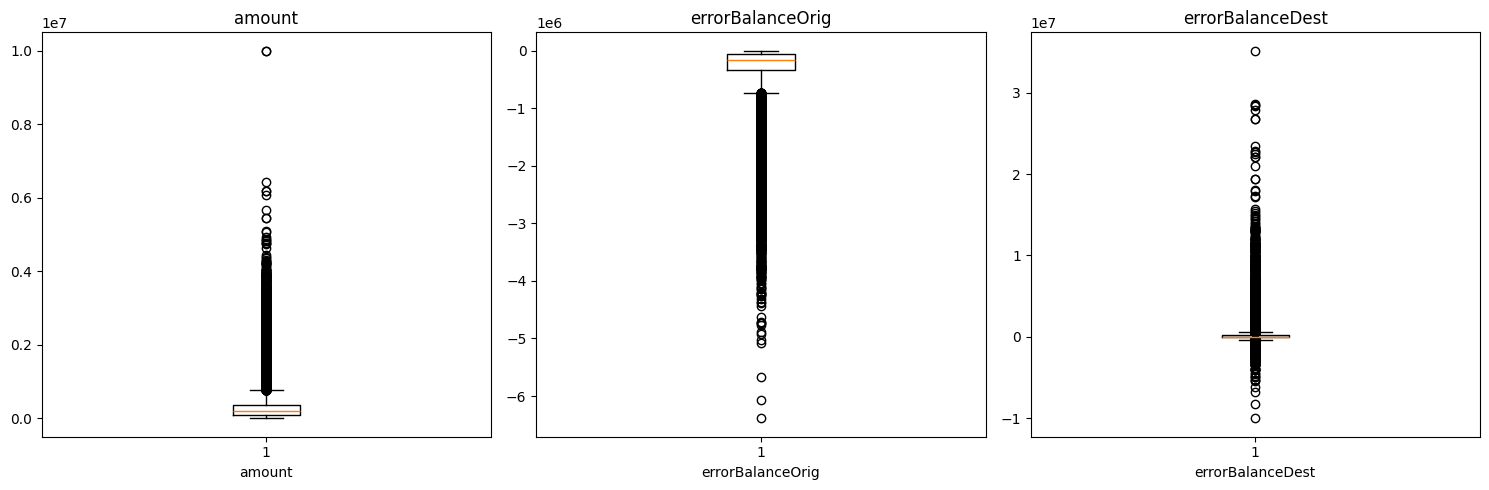

In [26]:
cols = ['amount', 'errorBalanceOrig', 'errorBalanceDest']

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(df2[col])
    plt.title(col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df2.drop(["isFraud"],axis=1)
y = df2["isFraud"]

In [29]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0.00,-181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0.00,-21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,-213808.94,-182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,-214605.30,-237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,-300850.89,2401220.0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
model_param = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param': {
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1),
            'max_features': ['sqrt', 'log2']  # Replace 'auto' with 'sqrt'
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(
          objective='binary:logistic',
          scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
        ),
        'param': {
            'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [33]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=3,return_train_score=False, n_jobs=-1)
    model_selection.fit(X_train,y_train)
    scores.append({
      'model': model_name,
      'best_score': model_selection.best_score_,
      'best_params': model_selection.best_params_
    })

In [34]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': np.float64(0.9989452760537098),
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': np.float64(0.9994726380268549),
  'best_params': {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}}]

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

# Train the best model
final_model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    learning_rate=0.5,
    max_depth=3,
    n_estimators=200
)
final_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = final_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


[[18452     6]
 [    2    29]]
              precision    recall  f1-score   support

         0.0     0.9999    0.9997    0.9998     18458
         1.0     0.8286    0.9355    0.8788        31

    accuracy                         0.9996     18489
   macro avg     0.9142    0.9676    0.9393     18489
weighted avg     0.9996    0.9996    0.9996     18489

